# Lecture 5a - Ordinary Differental Equations 1

# The Euler Method

A first-order ordinary differential equation can be written as
$$\frac{d y}{dt} = g(y, t)$$
The time derivative can depend on the value of $y(t)$ as well as on $t$.

To solve a differential equation on a computer, we use a discrete approximation to the derivative
$$\frac{d y}{dt} = \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}$$
where we're evaluating $y$ at discrete *time steps* $t_{i}$.

We'll start with the simplest method for solving a differential equation, the Euler method (which is what we used last year). After that, we will use a SciPy package which is much more sophisticated and accurate.

We'll work with equal time steps given by $t_{i+1} - t_{i} = \tau$. The Euler method makes a simple approximation:

$$y_{i+1} = y_{i} + g_{i} \tau + O(\tau^2)$$

The last term just means that we've ignored any terms of order $\tau^2$ or higher. The bigger $\tau$ is, the bigger the error will be.

We'll see how this works by solving the equation

$$\frac{d y}{dt} = - y ~,$$

which has the solution $y(t) = A~e^{-t}$.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# A new import - scipy's basic ODE integration function
from scipy.integrate import odeint

We'll start by defining variables for the time step $\tau$, the starting time $t_0$ and the desired final time $t_f$. We also have an initial condition $y_i$. The initial condition is the value of $y$ at the starting time, i.e. $y(t_0)$.

In [ ]:
tau = 0.1
yi = 1.
t0 = 0
tf = 10.

Now we do the following. At the start, record these values of $t$ and $y$ in a list. Then
 1. Compute the derivative at this value of $t$ and $y$.
 1. Increase $t$ by $\tau$, and $y$ according to the equations above for $y_{i+1}$.
 1. Record the new values, and take another step unless you've reached the final desired time $t_f$.


## Exercise

Write the code described above.

In [ ]:
# Answer here
t_vals = [t0]
y_vals = [yi]
current_t = t0
current_y = yi

while current_t < tf:
  t = current_t + tau
  y = current_y - (current_y*tau)
  t_vals.append(t)
  y_vals.append(y)
  current_t = t
  current_y = y

## Exercise

Make your code output $t$ and $y$ as the two columns in a numpy array called `result1`.

Now make a plot of the results. There should be two lines in the plot below which agree - the black expected plot (i.e. see the expoential equation above), and the green dots of the Euler method solution. How well do they agree?

In [ ]:
# Answer here
result1 = np.zeros([len(t_vals), 2])
result1[:,0] = t_vals
result1[:,1] = y_vals

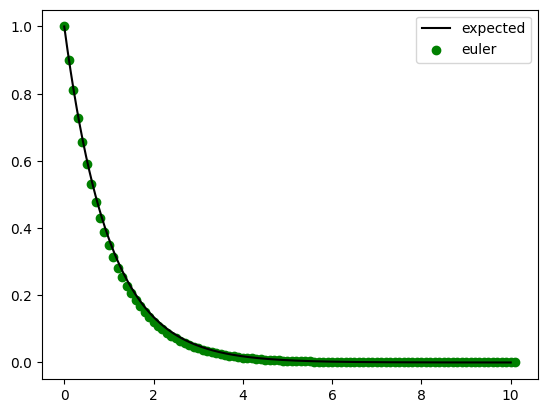

In [ ]:
# Answer here
time = np.linspace(t0, tf, 1000)
plt.plot(time, np.exp(-time), c='k', label='expected')
plt.scatter(result1[:,0], result1[:,1], c='g', label = 'euler')
plt.legend()

## Exercise

Turn this code into a function which takes tau and returns the `result` data structure. Also create a function which takes the result and makes a plot like the one above.

In [ ]:
# Answer here
def euler(tau):
  t_vals = [t0]
  y_vals = [yi]
  current_t = t0
  current_y = yi

  while current_t < tf:
    t = current_t + tau
    y = current_y - (current_y*tau)
    t_vals.append(t)
    y_vals.append(y)
    current_t = t
    current_y = y

  result = np.zeros([len(t_vals), 2])
  result[:,0] = t_vals
  result[:,1] = y_vals

  return result

In [ ]:
def plot_euler(result):
  time = np.linspace(t0, tf, 1000)
  plt.plot(time, np.exp(-time), c='k', label='expected')
  plt.scatter(result[:,0], result[:,1], c='g', label = 'euler')
  plt.legend()


## Exercise

Make the time step above $\tau = 1.5$. What happens?

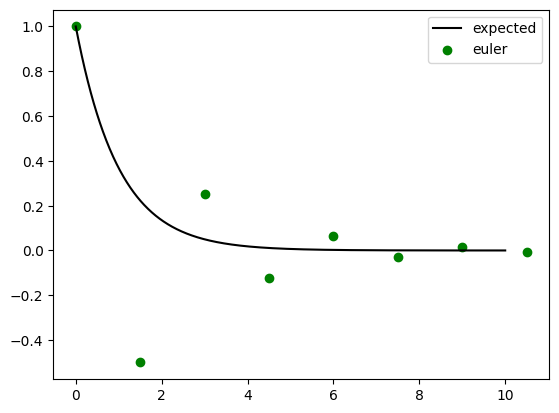

In [ ]:
# Answer here
result2 = euler(1.5)
plot_euler(result2)


## Exercise

Now vary $\tau$ and see what it takes to make the solution quite accurate.

In [ ]:
# Answer here
errors = []
for i in range(6):
  tau = 10**(-i)
  result = euler(tau)
  time = np.arange(t0, tf, tau)
  error = np.max(np.abs(result[:len(time), 1] - np.exp(-time)))
  errors.append((tau, error))

errors = np.array(errors)

Text(0, 0.5, 'Error')

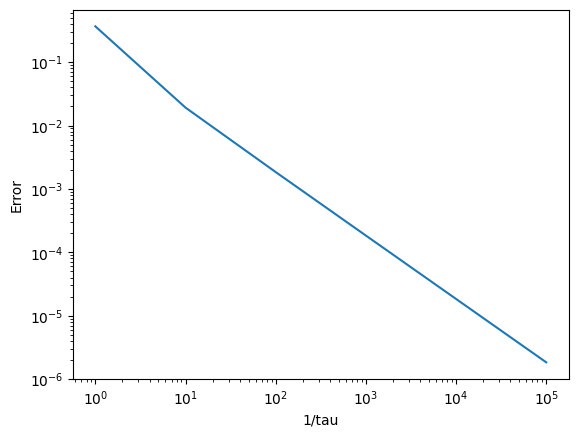

In [ ]:
# Answer here
plt.loglog(1/errors[:,0], errors[:,1])
plt.xlabel('1/tau')
plt.ylabel('Error')